## Principal Component Analysis

In [1]:
# load libraries
import os
import sys
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Data Analysis

#### Steps

##### Partially loading the CSV file

In [2]:
df = pd.read_csv('humbug.csv', nrows=1000)

In [3]:
df.to_csv('humbug_min.csv')

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'humbug.csv',
 'humbug_1.ipynb',
 'humbug_min.csv',
 'sample_data.7z']

In [5]:
df.shape

(1000, 131)

In [6]:
df.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,1,836320.0,481570.0,109790.0,233260.0,455560.0,1356760.0,...,373410.0,328469.0,0.0,0.0,0.0,0.0,61920.0,48150.0,732670.0,1933120.0
1,1,AL,0,2,494830.0,206630.0,146250.0,129390.0,275920.0,1010990.0,...,395880.0,965011.0,0.0,0.0,0.0,0.0,73720.0,107304.0,415410.0,1187403.0
2,1,AL,0,3,261250.0,80720.0,139280.0,36130.0,155100.0,583910.0,...,251490.0,1333418.0,0.0,0.0,0.0,0.0,64200.0,139598.0,193030.0,536699.0
3,1,AL,0,4,166690.0,28510.0,124650.0,10630.0,99950.0,423990.0,...,165320.0,1414283.0,0.0,0.0,0.0,0.0,45460.0,128823.0,116440.0,377177.0
4,1,AL,0,5,212660.0,19520.0,184320.0,4830.0,126860.0,589490.0,...,212000.0,3820152.0,420.0,168.0,60.0,31.0,83330.0,421004.0,121570.0,483682.0


##### Get all the column names

In [7]:
cols = list(df.columns)
cols

['STATEFIPS',
 'STATE',
 'zipcode',
 'agi_stub',
 'N1',
 'mars1',
 'MARS2',
 'MARS4',
 'PREP',
 'N2',
 'NUMDEP',
 'TOTAL_VITA',
 'VITA',
 'TCE',
 'VITA_EIC',
 'RAL',
 'RAC',
 'ELDERLY',
 'A00100',
 'N02650',
 'A02650',
 'N00200',
 'A00200',
 'N00300',
 'A00300',
 'N00600',
 'A00600',
 'N00650',
 'A00650',
 'N00700',
 'A00700',
 'N00900',
 'A00900',
 'N01000',
 'A01000',
 'N01400',
 'A01400',
 'N01700',
 'A01700',
 'SCHF',
 'N02300',
 'A02300',
 'N02500',
 'A02500',
 'N26270',
 'A26270',
 'N02900',
 'A02900',
 'N03220',
 'A03220',
 'N03300',
 'A03300',
 'N03270',
 'A03270',
 'N03150',
 'A03150',
 'N03210',
 'A03210',
 'N03230',
 'A03230',
 'N03240',
 'A03240',
 'N04470',
 'A04470',
 'A00101',
 'N18425',
 'A18425',
 'N18450',
 'A18450',
 'N18500',
 'A18500',
 'N18300',
 'A18300',
 'N19300',
 'A19300',
 'N19700',
 'A19700',
 'N04800',
 'A04800',
 'N05800',
 'A05800',
 'N09600',
 'A09600',
 'N05780',
 'A05780',
 'N07100',
 'A07100',
 'N07300',
 'A07300',
 'N07180',
 'A07180',
 'N07230',
 '

##### Get all the dtypes

In [8]:
col_type = df.dtypes
col_type_dict = {}
for item in col_type.items():
    col_type_dict[item[0]] = item[1]

col_type_dict

{'A00100': dtype('float64'),
 'A00101': dtype('float64'),
 'A00200': dtype('float64'),
 'A00300': dtype('float64'),
 'A00600': dtype('float64'),
 'A00650': dtype('float64'),
 'A00700': dtype('float64'),
 'A00900': dtype('float64'),
 'A01000': dtype('float64'),
 'A01400': dtype('float64'),
 'A01700': dtype('float64'),
 'A02300': dtype('float64'),
 'A02500': dtype('float64'),
 'A02650': dtype('float64'),
 'A02900': dtype('float64'),
 'A03150': dtype('float64'),
 'A03210': dtype('float64'),
 'A03220': dtype('float64'),
 'A03230': dtype('float64'),
 'A03240': dtype('float64'),
 'A03270': dtype('float64'),
 'A03300': dtype('float64'),
 'A04470': dtype('float64'),
 'A04800': dtype('float64'),
 'A05780': dtype('float64'),
 'A05800': dtype('float64'),
 'A06500': dtype('float64'),
 'A07100': dtype('float64'),
 'A07180': dtype('float64'),
 'A07220': dtype('float64'),
 'A07230': dtype('float64'),
 'A07240': dtype('float64'),
 'A07260': dtype('float64'),
 'A07300': dtype('float64'),
 'A09400': dty

##### Check the ftypes

In [9]:
df.ftypes

STATEFIPS       int64:dense
STATE          object:dense
zipcode         int64:dense
agi_stub        int64:dense
N1            float64:dense
mars1         float64:dense
MARS2         float64:dense
MARS4         float64:dense
PREP          float64:dense
N2            float64:dense
NUMDEP        float64:dense
TOTAL_VITA    float64:dense
VITA          float64:dense
TCE           float64:dense
VITA_EIC      float64:dense
RAL           float64:dense
RAC           float64:dense
ELDERLY       float64:dense
A00100        float64:dense
N02650        float64:dense
A02650        float64:dense
N00200        float64:dense
A00200        float64:dense
N00300        float64:dense
A00300        float64:dense
N00600        float64:dense
A00600        float64:dense
N00650        float64:dense
A00650        float64:dense
N00700        float64:dense
                  ...      
N85770        float64:dense
A85770        float64:dense
N85775        float64:dense
A85775        float64:dense
N09750        float6

In [10]:
df.describe()

,STATEFIPS,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
count,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000,1.000000e+03,1000.000000,...,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1.0,35027.626000,3.496000,2698.520000,1095.51000,1001.63000,549.210000,1528.31000,5.488090e+03,1944.740000,...,1942.970000,1.947588e+04,33.630000,62.131000,40.530000,144.961000,481.550000,2271.933000,2117.260000,6.369367e+03
std,0.0,2728.883927,1.707894,32922.526303,16786.86905,10201.50258,8513.932706,18274.04732,6.112306e+04,22436.198228,...,20785.834209,2.369407e+05,705.091112,1270.585383,877.498161,3060.483552,4802.332839,29290.667364,27794.181395,7.648926e+04
min,1.0,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.0,35083.000000,2.000000,90.000000,0.00000,60.00000,0.000000,60.00000,2.200000e+02,70.000000,...,80.000000,4.720000e+02,0.000000,0.000000,0.000000,0.000000,30.000000,39.000000,50.000000,2.060000e+02
50%,1.0,35183.000000,3.000000,290.000000,70.00000,140.00000,30.000000,180.00000,7.050000e+02,220.000000,...,250.000000,1.415500e+03,0.000000,0.000000,0.000000,0.000000,60.000000,142.500000,210.000000,7.135000e+02
75%,1.0,35448.250000,5.000000,832.500000,280.00000,330.00000,120.000000,490.00000,1.842500e+03,595.000000,...,662.500000,3.853250e+03,0.000000,0.000000,0.000000,0.000000,160.000000,418.500000,625.000000,1.897500e+03
max,1.0,35572.000000,6.000000,836320.000000,481570.00000,184320.00000,233260.000000,455560.00000,1.356760e+06,525260.000000,...,395880.000000,6.027793e+06,22090.000000,39519.000000,27550.000000,95112.000000,83330.000000,791573.000000,732670.000000,1.933120e+06


In [11]:
df.describe(include='all')

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
count,1000.0,1000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000,1.000000e+03,...,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
unique,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.0,NaN,35027.626000,3.496000,2698.520000,1095.51000,1001.63000,549.210000,1528.31000,5.488090e+03,...,1942.970000,1.947588e+04,33.630000,62.131000,40.530000,144.961000,481.550000,2271.933000,2117.260000,6.369367e+03
std,0.0,NaN,2728.883927,1.707894,32922.526303,16786.86905,10201.50258,8513.932706,18274.04732,6.112306e+04,...,20785.834209,2.369407e+05,705.091112,1270.585383,877.498161,3060.483552,4802.332839,29290.667364,27794.181395,7.648926e+04
min,1.0,NaN,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.0,NaN,35083.000000,2.000000,90.000000,0.00000,60.00000,0.000000,60.00000,2.200000e+02,...,80.000000,4.720000e+02,0.000000,0.000000,0.000000,0.000000,30.000000,39.000000,50.000000,2.060000e+02
50%,1.0,NaN,35183.000000,3.000000,290.000000,70.00000,140.00000,30.000000,180.00000,7.050000e+02,...,250.000000,1.415500e+03,0.000000,0.000000,0.000000,0.000000,60.000000,142.500000,210.000000,7.135000e+02
75%,1.0,NaN,35448.250000,5.000000,832.500000,280.00000,330.00000,120.000000,490.00000,1.842500e+03,...,662.500000,3.853250e+03,0.000000,0.000000,0.000000,0.000000,160.000000,418.500000,625.000000,1.897500e+03


In [12]:
df['STATEFIPS'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
970    1
971    1
972    1
973    1
974    1
975    1
976    1
977    1
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    1
999    1
Name: STATEFIPS, Length: 1000, dtype: int64>

In [13]:
correlations = df.corr()
correlations

,STATEFIPS,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
STATEFIPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zipcode,NaN,1.000000,-0.000468,-0.789801,-0.626475,-0.947557,-0.624622,-0.810621,-0.865823,-0.835355,...,-0.896912,-0.751570,-0.409060,-0.400027,-0.403201,-0.398239,-0.954087,-0.716363,-0.736158,-0.799616
agi_stub,NaN,-0.000468,1.000000,-0.056266,-0.069444,-0.005643,-0.070583,-0.053277,-0.045527,-0.049127,...,-0.040655,0.067088,0.069450,0.071650,0.067726,0.069504,-0.011437,0.066336,-0.062685,-0.052002
N1,NaN,-0.789801,-0.056266,1.000000,0.965207,0.777715,0.965119,0.999348,0.985110,0.993782,...,0.943872,0.312912,0.053484,0.050190,0.050196,0.049293,0.828362,0.290126,0.995873,0.997926
mars1,NaN,-0.626475,-0.069444,0.965207,1.000000,0.588321,0.994321,0.956271,0.905983,0.932064,...,0.829675,0.145435,0.003202,0.002570,0.002682,0.002507,0.655559,0.139500,0.983178,0.962930
MARS2,NaN,-0.947557,-0.005643,0.777715,0.588321,1.000000,0.591243,0.797511,0.871535,0.834337,...,0.919048,0.632537,0.159875,0.150811,0.150479,0.148060,0.992377,0.574619,0.719912,0.774478
MARS4,NaN,-0.624622,-0.070583,0.965119,0.994321,0.591243,1.000000,0.956174,0.910705,0.937357,...,0.844754,0.136495,-0.001399,-0.001739,-0.001608,-0.001724,0.660282,0.131059,0.983998,0.965063
PREP,NaN,-0.810621,-0.053277,0.999348,0.956271,0.797511,0.956174,1.000000,0.989839,0.996163,...,0.952867,0.340803,0.072281,0.068719,0.068759,0.067726,0.846211,0.316815,0.992210,0.997720
N2,NaN,-0.865823,-0.045527,0.985110,0.905983,0.871535,0.910705,0.989839,1.000000,0.997206,...,0.983933,0.410303,0.085175,0.080304,0.080208,0.078869,0.909978,0.377621,0.966856,0.983598
NUMDEP,NaN,-0.835355,-0.049127,0.993782,0.932064,0.834337,0.937357,0.996163,0.997206,1.000000,...,0.970946,0.376938,0.078993,0.074674,0.074556,0.073341,0.879216,0.348890,0.981341,0.993439


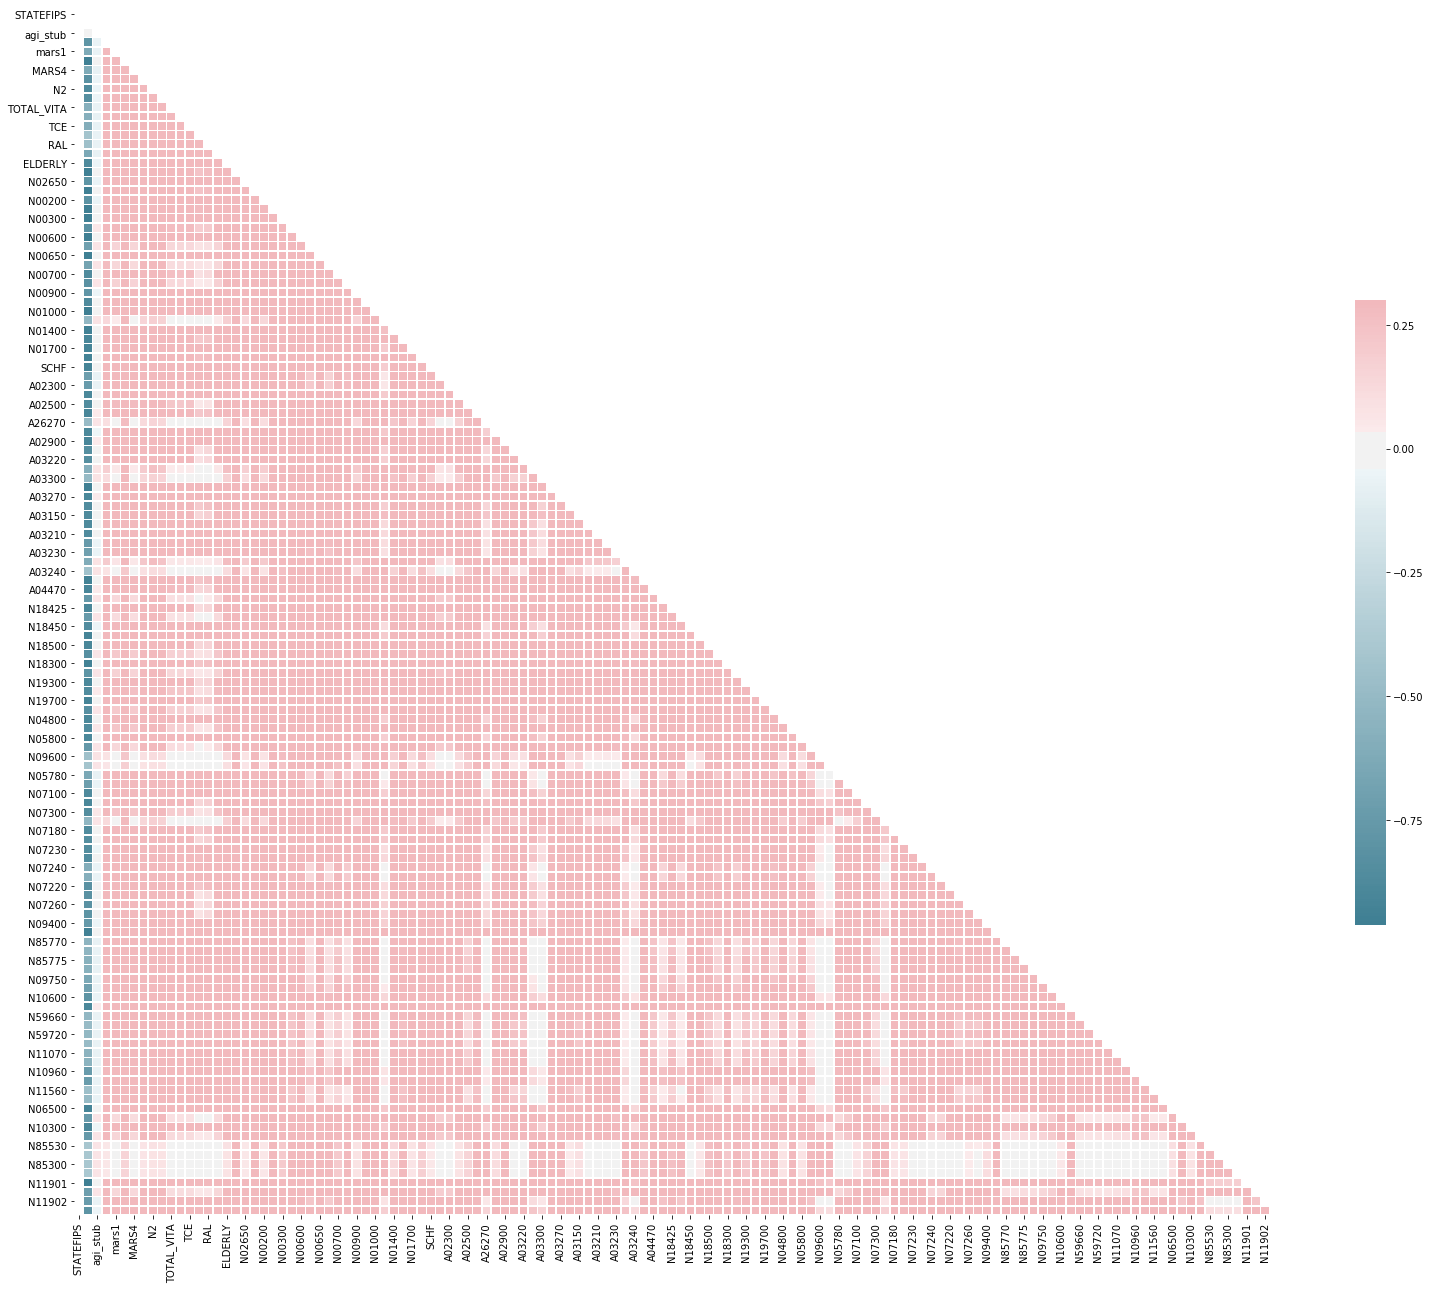

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27, 23))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
len(cols)

131

In [16]:
'''
for i in range(2,131,5):
    #df.hist(cols[i:i+5])
    print(i, i+5)
'''

'\nfor i in range(2,131,5):\n    #df.hist(cols[i:i+5])\n    print(i, i+5)\n'

### Dimensionality Reduction

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
features = ['A00100','N02650','A02650','N00200','A00200',
            'N00300','A00300','N00600','A00600','N00650',
            'A00650','N00700','A00700','N00900','A00900',
            'N01000','A01000','N01400','A01400','N01700',
            'A01700','N02300','A02300','N02500','A02500',
            'N26270','A26270','N02900','A02900','N03220',
            'A03220','N03300','A03300','N03270','A03270',
            'N03150','A03150','N03210','A03210','N03230',
            'A03230','N03240','A03240','N04470','A04470',
            'A00101','N18425','A18425','N18450','A18450',
            'N18500','A18500','N18300','A18300','N19300',
            'A19300','N19700','A19700','N04800','A04800',
            'N05800','A05800','N09600','A09600','N05780',
            'A05780','N07100','A07100','N07300','A07300',
            'N07180','A07180','N07230','A07230','N07240',
            'A07240','N07220','A07220','N07260','A07260',
            'N09400','A09400','N85770','A85770','N85775',
            'A85775','N09750','A09750','N10600','A10600',
            'N59660','A59660','N59720','A59720','N11070',
            'A11070','N10960','A10960','N11560','A11560',
            'N06500','A06500','N10300','A10300','N85530',
            'A85530','N85300','A85300','N11901','A11901',
            'N11902','A11902']

In [19]:
len(features)

112

In [20]:
x = df.loc[:, features].values

In [21]:
x.shape

(1000, 112)

In [22]:
x[1]

array([1.7781527e+07, 4.9483000e+05, 1.7960153e+07, 4.2782000e+05,
       1.4643298e+07, 9.0480000e+04, 6.6324000e+04, 4.0480000e+04,
       9.5308000e+04, 3.5830000e+04, 6.6763000e+04, 4.9520000e+04,
       2.6660000e+04, 6.3680000e+04, 2.5589800e+05, 3.1610000e+04,
       6.6922000e+04, 3.5180000e+04, 3.3885100e+05, 9.9840000e+04,
       1.8017460e+06, 1.6060000e+04, 4.6355000e+04, 9.0510000e+04,
       5.9134100e+05, 1.0930000e+04, 6.6571000e+04, 9.4730000e+04,
       1.7862600e+05, 1.3350000e+04, 3.2230000e+03, 2.0000000e+02,
       2.5530000e+03, 7.2000000e+03, 3.4816000e+04, 7.1900000e+03,
       2.3874000e+04, 4.0260000e+04, 4.2458000e+04, 2.3700000e+03,
       5.8280000e+03, 4.0000000e+01, 8.3000000e+01, 1.0359000e+05,
       1.5747970e+06, 3.9465880e+06, 7.5750000e+04, 1.2706200e+05,
       2.4460000e+04, 2.9797000e+04, 6.7170000e+04, 5.5491000e+04,
       1.0253000e+05, 2.3664900e+05, 6.1480000e+04, 3.2376900e+05,
       8.6280000e+04, 3.3381000e+05, 4.7376000e+05, 8.6646880e

In [23]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [24]:
x

array([[ 6.99171478, 25.33321394,  7.02121686, ...,  1.56708697,
        26.29752897, 25.20242476],
       [11.51680388, 14.95573462, 11.48945052, ...,  3.58764862,
        14.87719806, 15.44824263],
       [10.39258316,  7.85730537, 10.36438666, ...,  4.69073579,
         6.87223938,  6.93685651],
       ...,
       [-0.0986661 , -0.07896828, -0.09869252, ..., -0.07760389,
        -0.07297478, -0.07975523],
       [-0.09771938, -0.07987997, -0.09773419, ..., -0.07507623,
        -0.07333475, -0.08054004],
       [-0.1009398 , -0.08200725, -0.10095508, ..., -0.07760389,
        -0.07621449, -0.08331306]])

In [25]:
x.shape

(1000, 112)

In [26]:
x[1]

array([ 1.15168039e+01,  1.49557346e+01,  1.14894505e+01,  1.56766982e+01,
        1.35371049e+01,  1.36981357e+01,  6.33895589e+00,  1.15477088e+01,
        3.22781996e+00,  1.11271493e+01,  2.79410175e+00,  1.04908518e+01,
        5.04329707e+00,  1.16045342e+01,  5.55911485e+00,  1.06857619e+01,
        7.60429985e-01,  1.53957167e+01,  8.82954920e+00,  1.69549764e+01,
        1.29502706e+01,  1.58080428e+01,  1.55664363e+01,  2.15169421e+01,
        1.02101597e+01,  8.73711793e+00,  3.59023546e-01,  1.41295570e+01,
        8.96181107e+00,  1.95879459e+01,  1.85693446e+01,  1.92663141e+00,
        8.08367602e-01,  1.33696285e+01,  8.72221880e+00,  2.08977096e+01,
        1.59266820e+01,  2.09828201e+01,  2.07739572e+01,  9.17516614e+00,
        8.47221925e+00,  6.00605424e-01, -1.43081771e-02,  1.40262485e+01,
        9.26156466e+00,  3.69486504e+00,  1.22090602e+01,  3.29905364e+00,
        1.96699217e+01,  1.81897225e+01,  1.08712501e+01,  5.75387583e+00,
        1.39434187e+01,  

##### before Standardisation

1.7781527e+07, 4.9483000e+05, 1.7960153e+07, 4.2782000e+05,
...

##### after

1.15168039e+01,  1.49557346e+01,  1.14894505e+01,  1.56766982e+01,
...

In [27]:
pca = PCA(n_components=2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
principalComponents = pca.fit_transform(x)
principalComponents

array([[ 1.19864262e+02, -8.78868590e+01],
       [ 1.33266059e+02, -4.63072153e+01],
       [ 9.35029272e+01, -3.30077218e+00],
       ...,
       [-8.53755708e-01, -7.54514174e-02],
       [-8.57056475e-01, -6.78273137e-02],
       [-8.74508830e-01, -6.96077999e-02]])

In [29]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [30]:
principalDf.head()

,PC1,PC2
0,119.864262,-87.886859
1,133.266059,-46.307215
2,93.502927,-3.300772
3,70.565456,8.599017
4,126.835772,44.294242


#### Transforming the data

In [31]:
features_ = ['zipcode', 'agi_stub','N1', 'mars1', 
             'MARS2', 'MARS4', 'PREP', 'N2',
             'NUMDEP', 'VITA','SCHF']

In [32]:
len(features_)

11

In [33]:
df1 = df[features_]

In [34]:
finalDf = pd.concat([df1, principalDf], axis = 1)
finalDf.head()

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,VITA,SCHF,PC1,PC2
0,0,1,836320.0,481570.0,109790.0,233260.0,455560.0,1356760.0,525260.0,16850.0,8440.0,119.864262,-87.886859
1,0,2,494830.0,206630.0,146250.0,129390.0,275920.0,1010990.0,372110.0,7020.0,9130.0,133.266059,-46.307215
2,0,3,261250.0,80720.0,139280.0,36130.0,155100.0,583910.0,183750.0,1150.0,9120.0,93.502927,-3.300772
3,0,4,166690.0,28510.0,124650.0,10630.0,99950.0,423990.0,132360.0,420.0,5270.0,70.565456,8.599017
4,0,5,212660.0,19520.0,184320.0,4830.0,126860.0,589490.0,192840.0,590.0,8150.0,126.835772,44.294242
